# 01、简介
###### 这是来自IBM的样本数据集，记录了用户订购的服务、账户信息及人口学特征。希望通过预测用户行为来留住用户，可以分析所有相关的用户数据，开发出有针对性的留存方法。

###### 每一行代表一个用户，每一列包括了用户的属性。数据集包括以下信息：

###### Churn：表示在最后一个月流失的用户。
###### (1)用户注册的服务，包括：phone（电话服务）, multiple lines（多条线路）, internet（网络服务）, online security（在线安全服务）, online backup（在线备份服务）, device protection（设备防护服务）, tech support（技术支持服务）, and streaming TV and movies（流TV及电影）。
###### (2)用户账户信息：在网时间，contract（付费周期）, payment method（付费方式）, paperless billing（无纸化账单）, monthly charges（月消费）, and total charges（总消费）。
###### (3)用户的人口学特征：gender（性别）, age range（年龄范围）, and if they have partners and dependents（是否有伴侣及子女）。

##### 数据情况如下
| 字段名称 | 字段类型| 说明 | 枚举值 | 
| --- | --- | --- | --- |
| customerID | object | 用户的唯一标识 |  |
| gender | object | 性别 | Male，Female |
| SeniorCitizen | int64 | 是否65岁以上老人 | 1，0 |
| Partner | object | 是否有伴侣 | Yes，No |
| Dependents | object | 是否有被抚养人（孩子、父母等） | Yes，No |
| tenure | int64 | 入网月数 |  |
| PhoneService | object | 订购家庭电话服务 | Yes，No |
| MultipleLines | object | 订购多条电话线路 | Yes，No |
| InternetService | object | 订购网络服务 | Fiber optic，DSL，No |
| OnlineSecurity | object | 订购附加的在线安全服务 | Yes，No，No internet service |
| OnlineBackup | object | 订购附加的在线备份服务 | Yes，No，No internet service |
| DeviceProtection | object | 为公司提供的网络设备购买附加的设备保护服务 | Yes，No，No internet service |
| TechSupport | object | 订购附加的技术支持以缩短等待时间 | Yes，No，No internet service |
| StreamingTV | object | 是否使用第三方的流TV（不额外收费） | Yes，No，No internet service |
| StreamingMovies | object | 是否使用第三方的流电影（不额外收费） | Yes，No，No internet service |
| Contract | object | 当前合约类型 | Month-to-month，One Year，Two Year |
| PaperlessBilling | object | 是否使用无纸化账单 | Yes，No |
| PaymentMethod | object | 用户付款方式 | Electronic check，Bank transfer (automatic)，Credit card (automatic)，Mailed check |
| MonthlyCharges | float64 | 当前的包含所有服务的月总费用 |  |
| TotalCharges | object | 入网至今的总费用 |  |
| Churn | object | 是否流失 | Yes，No |

In [74]:
import pandas as pd
import numpy as np
import time 

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info(memory_usage='deep')  # deep参数可以显示准确的内存占用



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 02、数据探索
###### 2.1 文件信息总览
###### 读取文件，可以看到：

###### 共有7043行，21列数据；
###### 大部分字段都是 object 类型，应该是字符串格式的；

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### 看一下不同值、值的分布

In [76]:
print(df.agg({pd.Series.nunique}))

         customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
nunique        7043       2              2        2           2      73   

         PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
nunique             2              3                3               3  ...   

         DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
nunique                 3            3            3                3   

         Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
nunique         3                 2              4            1585   

         TotalCharges  Churn  
nunique          6531      2  

[1 rows x 21 columns]


In [77]:
col_number = ['customerID','tenure','MonthlyCharges','TotalCharges']

for col in df.columns.values:
    if col not in col_number:
        print('列名: {}\n{}\n{}\n'.format(col, '-'*20, df[col].value_counts()))


列名: gender
--------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64

列名: SeniorCitizen
--------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

列名: Partner
--------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64

列名: Dependents
--------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

列名: PhoneService
--------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

列名: MultipleLines
--------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

列名: InternetService
--------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

列名: OnlineSecurity
--------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

列名: OnlineBackup
--------------------
OnlineBac

###### 合并 数据情况

In [78]:
tmp_unique = pd.DataFrame(columns=['sub_value', 'sub_num', 'column_name'])

for cc in df.columns.values:
    if cc not in col_number:
        tmp_df = df.groupby(cc, as_index=False).agg({'customerID':pd.Series.nunique})
        tmp_df['column_name'] = cc
        tmp_df.columns = ['sub_value','sub_num', 'column_name']
        tmp_unique = pd.concat([tmp_unique, tmp_df], axis=0)

tmp_unique = tmp_unique[['column_name','sub_value','sub_num']]
print(tmp_unique)

        column_name                  sub_value sub_num
0            gender                     Female    3488
1            gender                       Male    3555
0     SeniorCitizen                          0    5901
1     SeniorCitizen                          1    1142
0           Partner                         No    3641
1           Partner                        Yes    3402
0        Dependents                         No    4933
1        Dependents                        Yes    2110
0      PhoneService                         No     682
1      PhoneService                        Yes    6361
0     MultipleLines                         No    3390
1     MultipleLines           No phone service     682
2     MultipleLines                        Yes    2971
0   InternetService                        DSL    2421
1   InternetService                Fiber optic    3096
2   InternetService                         No    1526
0    OnlineSecurity                         No    3498
1    Onlin

In [79]:
# 把 TotalCharges 转成数值型 (str类型不能用 astype 转成 float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 查看是否有空值
print(df['TotalCharges'].isnull().sum())

# 有11行的 TotalCharges 为空，猜测这是指新入网用户还没产生费用？ tenure 指的是入网周期
df.loc[df['TotalCharges'].isnull(), ['customerID','tenure','MonthlyCharges','TotalCharges','Churn']]

# 将空值置为0
df['TotalCharges'].fillna(0, inplace=True)



11


C:\Users\54908\AppData\Local\Temp\ipykernel_6284\2404242015.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [80]:

df[['tenure','MonthlyCharges','TotalCharges']].agg({np.max, np.min, np.mean, pd.Series.std})


C:\Users\54908\AppData\Local\Temp\ipykernel_6284\4051393864.py:1: FutureWarning: The provided callable <function mean at 0x000001F55D8B99E0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[['tenure','MonthlyCharges','TotalCharges']].agg({np.max, np.min, np.mean, pd.Series.std})
C:\Users\54908\AppData\Local\Temp\ipykernel_6284\4051393864.py:1: FutureWarning: The provided callable <function min at 0x000001F55D8B9120> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df[['tenure','MonthlyCharges','TotalCharges']].agg({np.max, np.min, np.mean, pd.Series.std})
C:\Users\54908\AppData\Local\Temp\ipykernel_6284\4051393864.py:1: FutureWarning: The provided callable <function max at 0x000001F55D8B8FE0> is currently using Series.max. In a future version of pandas,

,tenure,MonthlyCharges,TotalCharges
std,24.559481,30.090047,2266.794470
mean,32.371149,64.761692,2279.734304
min,0.000000,18.250000,0.000000
max,72.000000,118.750000,8684.800000


#### 关系探索
##### 1 入网时长——流失数量

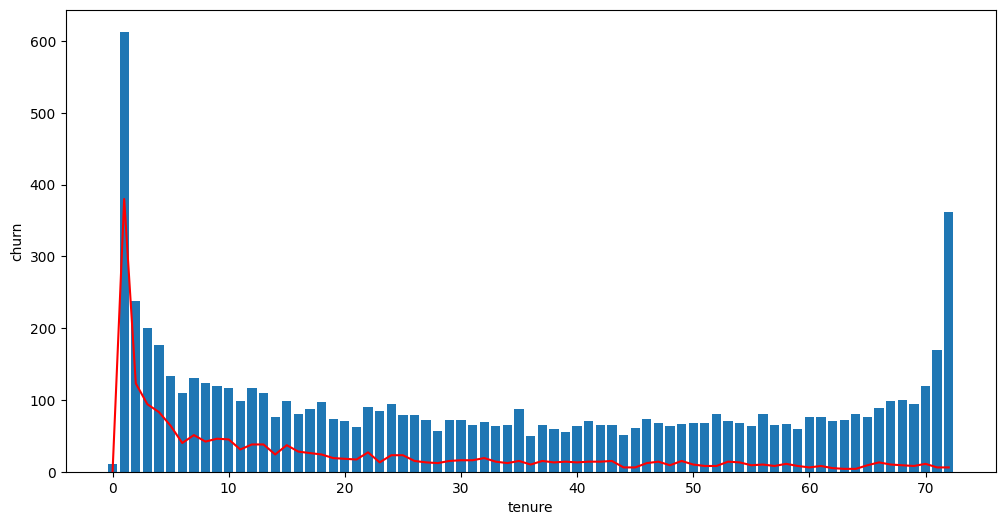

In [81]:
service = ['PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod']
demographic = ['gender','SeniorCitizen','Partner','Dependents']
account = ['customerID','tenure','MonthlyCharges','TotalCharges','Churn']


# 查看入网情况
tmp_df = df.groupby('tenure', as_index=False).agg({'customerID':pd.Series.count})
tmp_df.columns = ['tenure','cnts']

tmp_df2 = df[df['Churn'] == 'Yes'].groupby('tenure', as_index=False).agg({'customerID':pd.Series.count})
tmp_df2.columns = ['tenure','churn_yes']

tmp_df3 = df[df['Churn'] == 'No'].groupby('tenure', as_index=False).agg({'customerID':pd.Series.count})
tmp_df3.columns = ['tenure','churn_no']

tmp_df = tmp_df.merge(tmp_df2, on='tenure', how='left').merge(tmp_df3, on='tenure', how='left')
tmp_df.fillna(0, inplace=True)

# 绘图
s_name = list(tmp_df['tenure'])
s_value1 = list(tmp_df['cnts'])
s_value2 = list(tmp_df['churn_yes'])
s_value3 = list(tmp_df['churn_no'])

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,6), facecolor='w')
plt.bar(s_name, s_value1)
plt.plot(s_name, s_value2,'r-')
plt.xlabel("tenure")
plt.ylabel("churn")
plt.show()


#### 消费（月度、总额）——流失数量

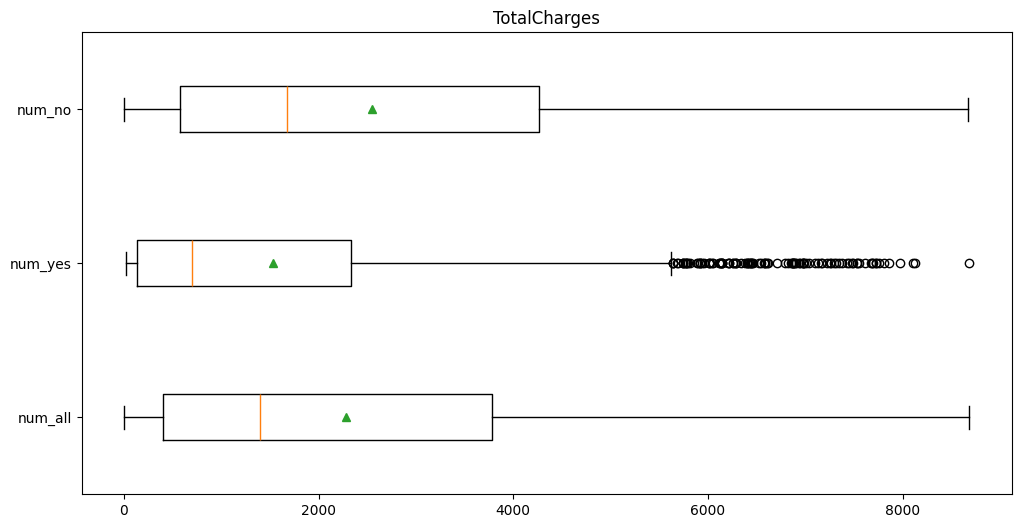

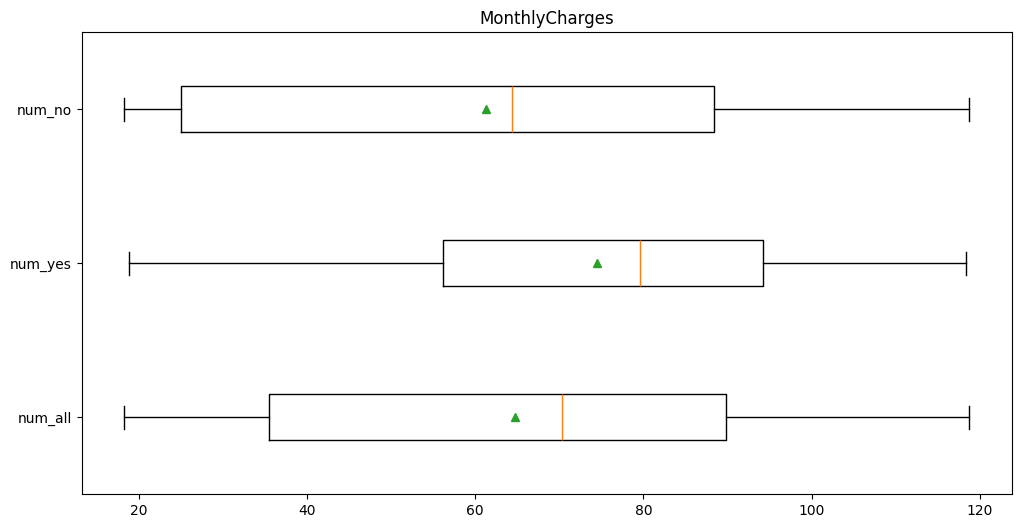

In [82]:

account_info = ['customerID','tenure','MonthlyCharges','TotalCharges','Churn']

def box_out(col):
    s_value1 = list(df[col])
    s_value2 = list(df.loc[(df['Churn'] == 'Yes'), col])
    s_value3 = list(df.loc[(df['Churn'] == 'No'), col])
    labels = ['num_all','num_yes','num_no']
    
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(12,6), facecolor='w')
    plt.boxplot([s_value1, s_value2, s_value3], labels=labels, vert=False, showmeans=True)
    plt.title(col)
    


box_out('TotalCharges')
box_out('MonthlyCharges')



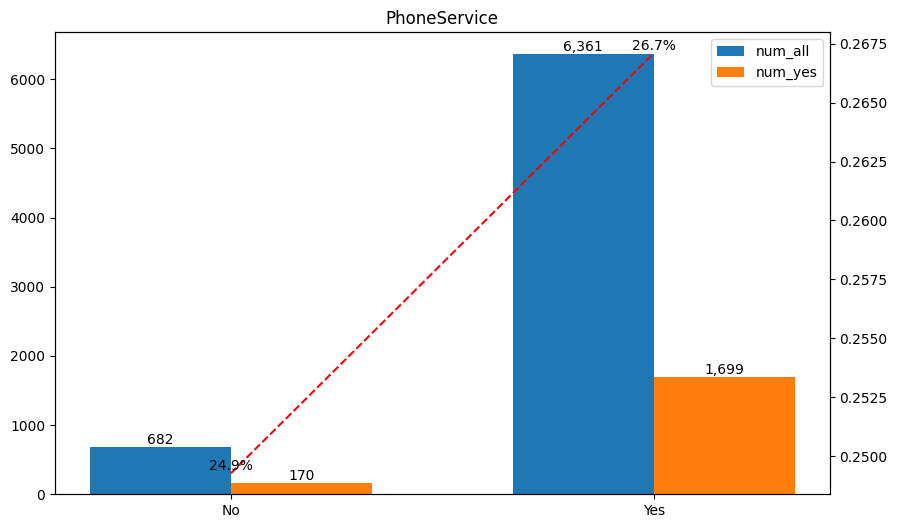

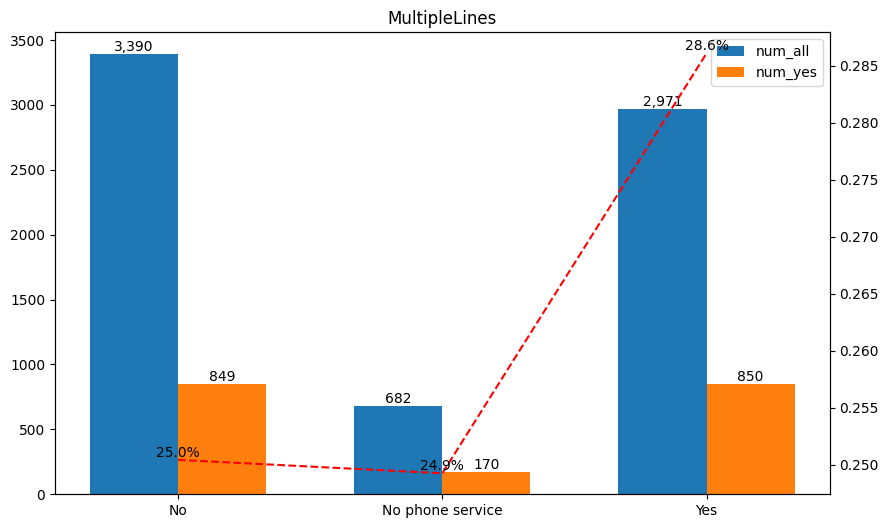

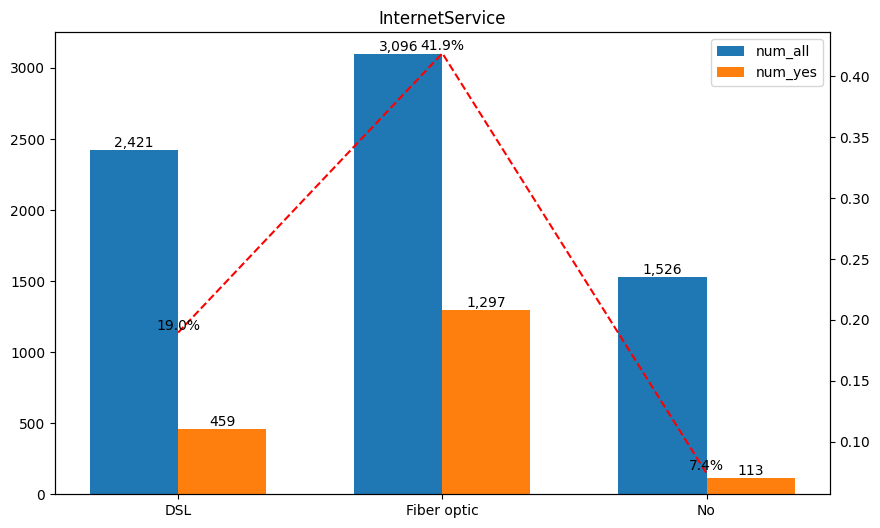

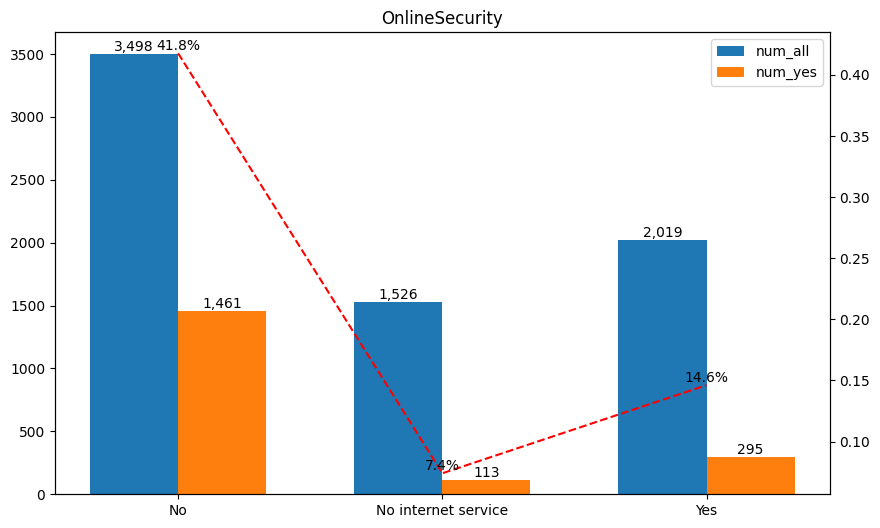

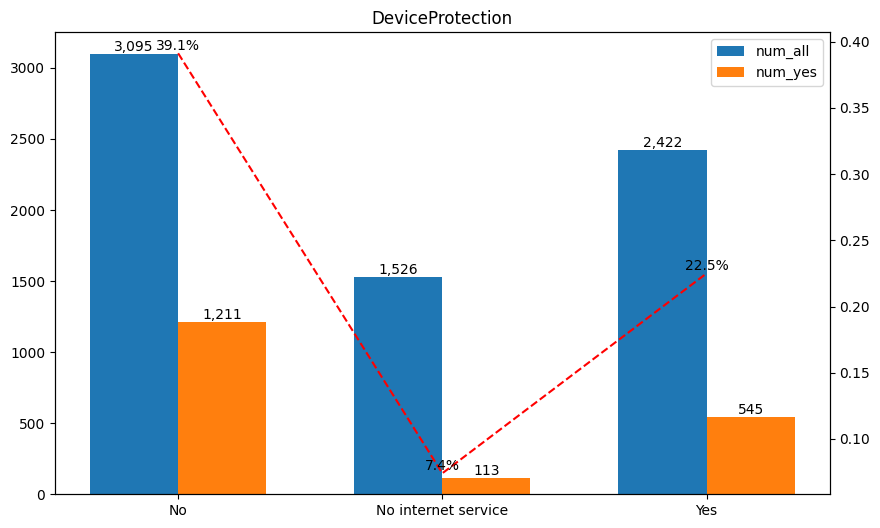

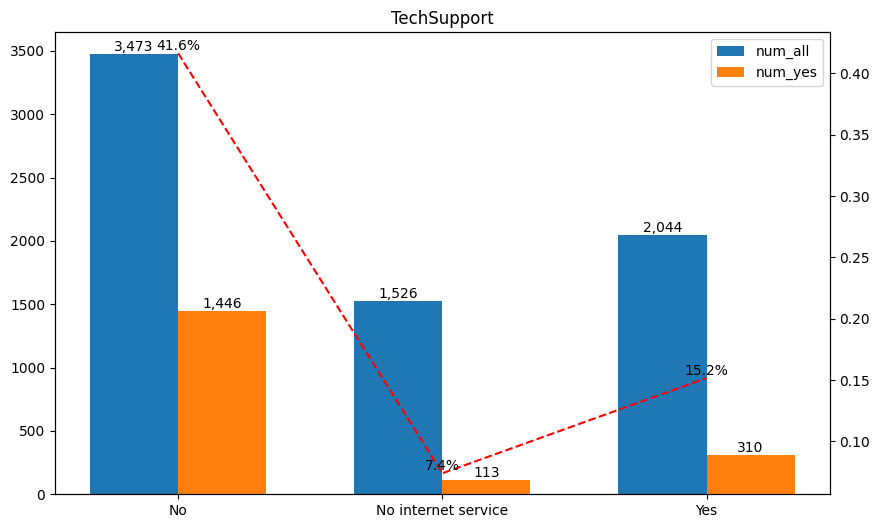

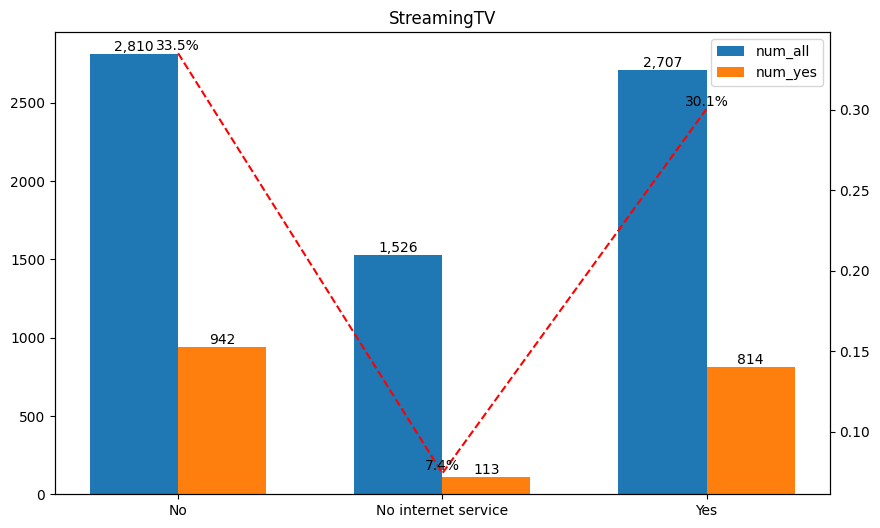

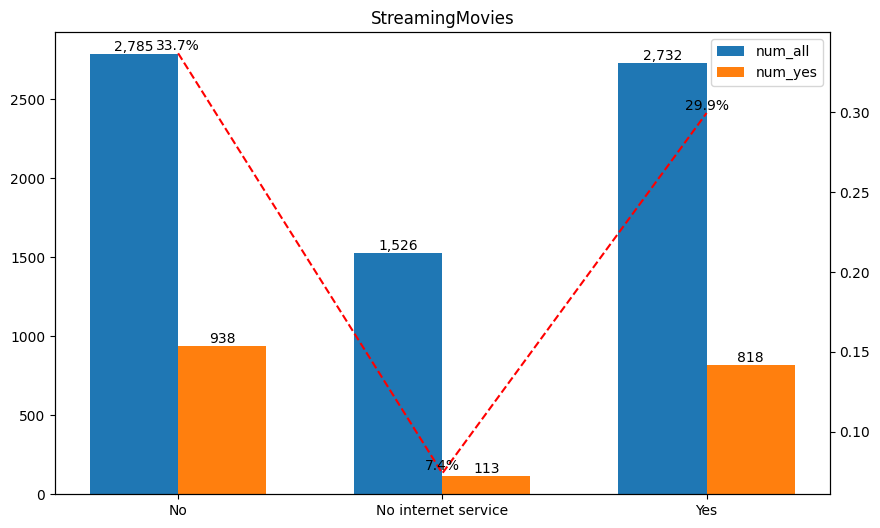

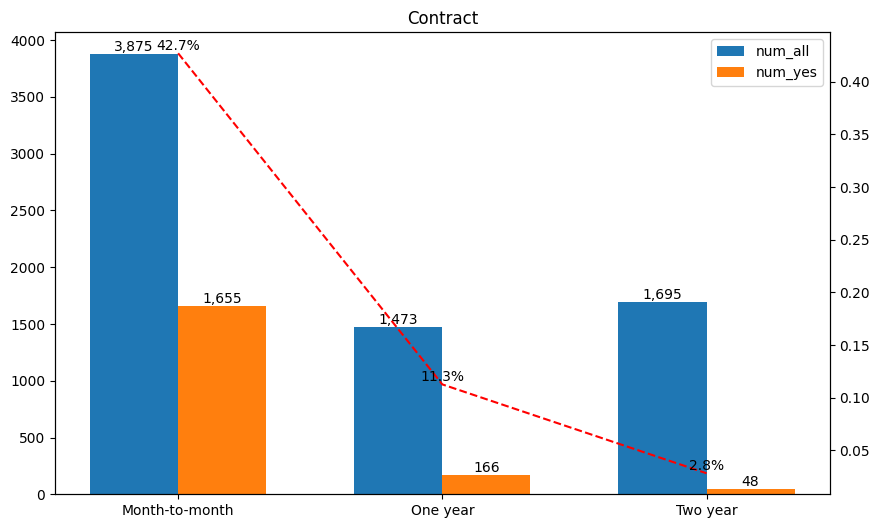

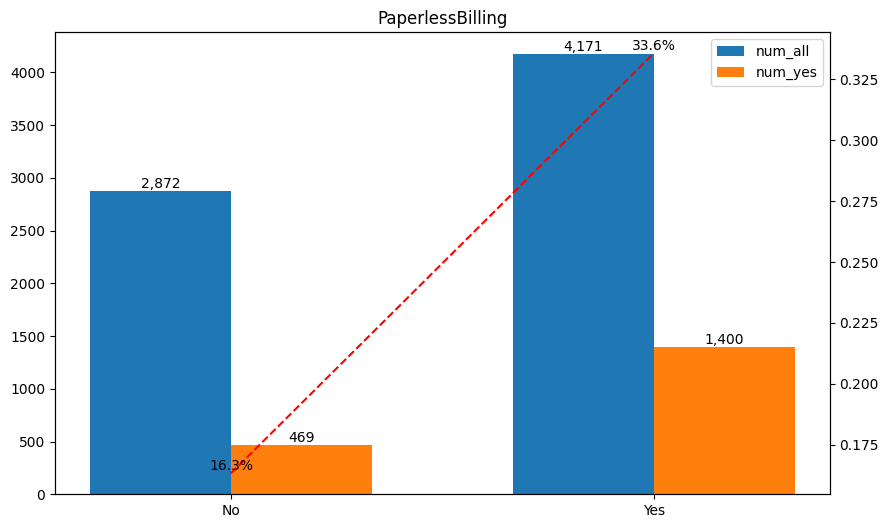

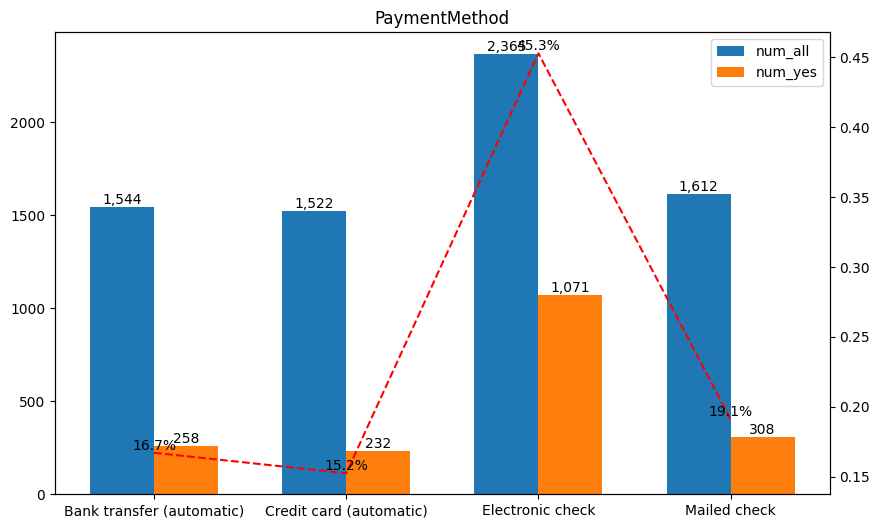

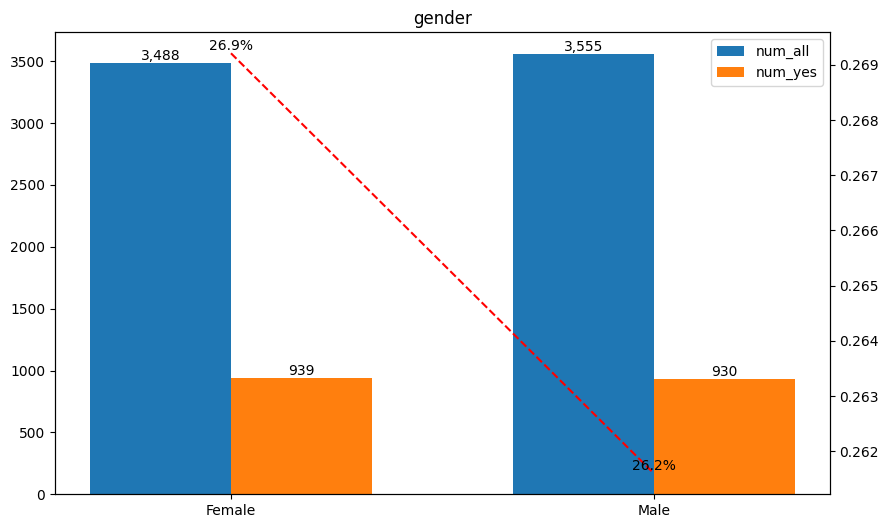

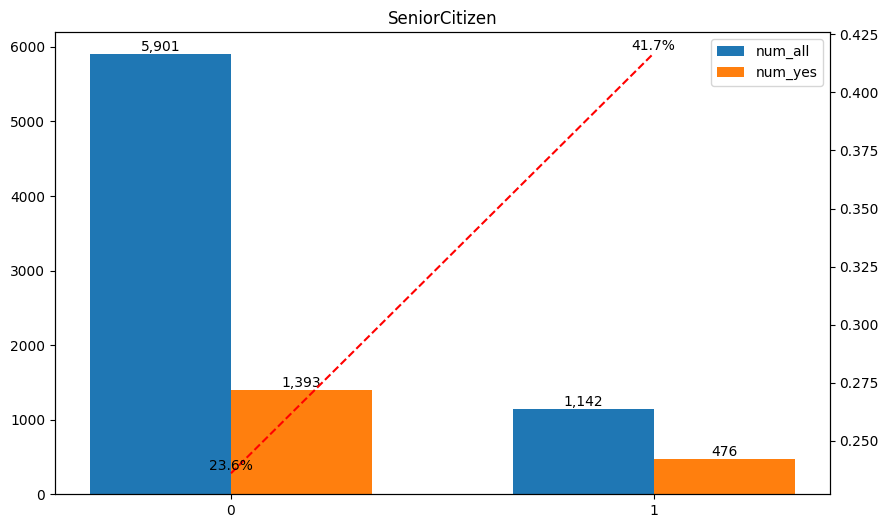

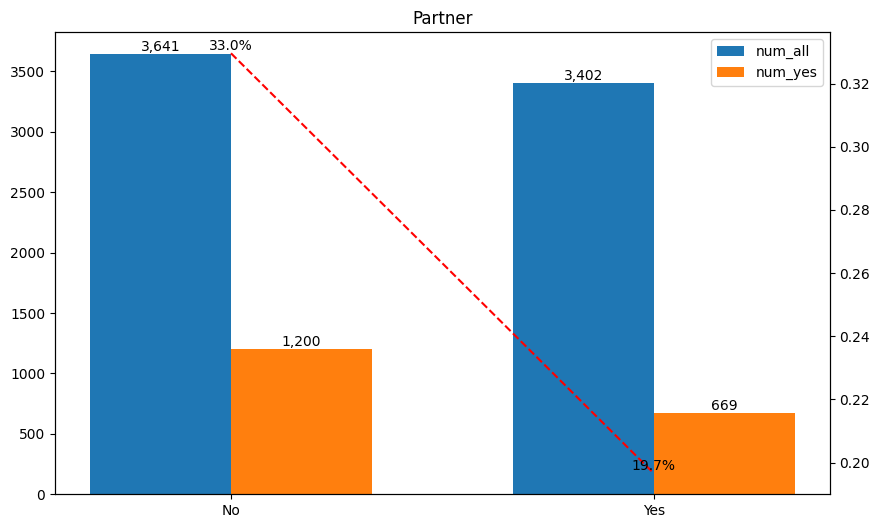

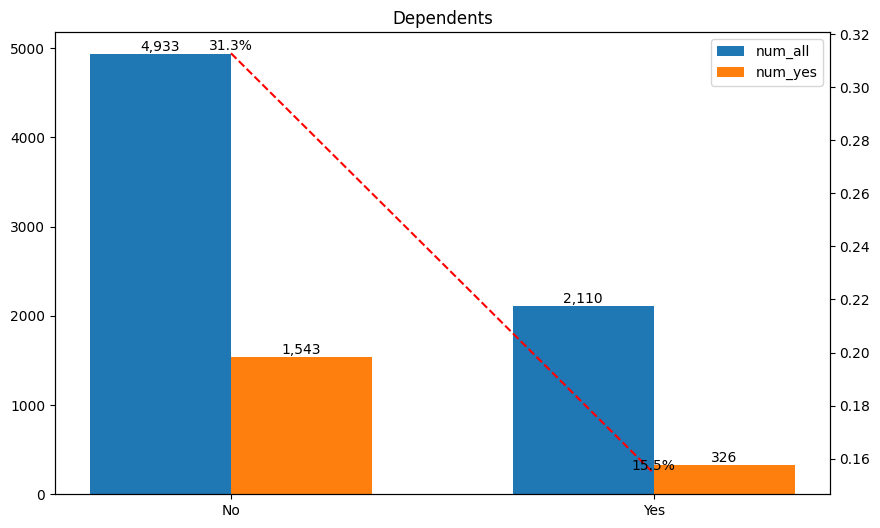

In [83]:
# 服务及人口学特征与流失的关系
def fig_out(col):
    tmp_df = df.groupby(col, as_index=False)['customerID'].count()
    tmp_df.columns =[col,'num_all']

    tmp_df2 = df[df['Churn'] == 'Yes'].groupby(col, as_index=False)['customerID'].count()
    tmp_df2.columns = [col,'num_yes']

    tmp_df = tmp_df.merge(tmp_df2, on=col, how='left')
    tmp_df.loc[:,['num_all','num_yes']].fillna(0, inplace=True)
    tmp_df.loc[:,'churn_yes'] = tmp_df[['num_yes','num_all']].apply(lambda x: (x['num_yes'] / x['num_all']), axis=1)
    #print(tmp_df)

    s_name = list(tmp_df[col])
    s_name2 = np.arange(len(s_name))
    s_value1 = list(tmp_df['num_all'])
    s_value2 = list(tmp_df['num_yes'])
    s_value3 = list(tmp_df['churn_yes'])
    
    # 条形图中 条的宽度
    wids = len(s_name) / (len(s_name) * 3)
    
    # 绘图
    from matplotlib import pyplot as plt
    fig, ax1 = plt.subplots(figsize=(10,6), facecolor='w')
    ax2 = ax1.twinx()
    
    ax1.bar(s_name2 - (wids/2), s_value1, width=wids, label='num_all')
    ax1.bar(s_name2 + (wids/2), s_value2, width=wids, label='num_yes')
    ax2.plot(s_name2, s_value3, color='r', linestyle='--', label='churn_yes')
    
    # 数据标签
    for a,b,c,d in zip(s_name2, s_value1, s_value2, s_value3):
        ax1.text(a - (wids/2), b, '{:,}'.format(b), ha='center', va='bottom', fontsize=10)
        ax1.text(a + (wids/2), c, '{:,}'.format(c), ha='center', va='bottom', fontsize=10)
        ax2.text(a, d, '{:.1%}'.format(d), ha='center', va='bottom', fontsize=10)
    
    ax1.legend()
    plt.title(col)
    plt.xticks(s_name2, s_name)
    #plt.legend(loc='upper right')
    plt.savefig('figure\\{}.png'.format(col), bbox_inches = 'tight', pad_inches = 0.1)



for cc in service:
    fig_out(cc)
    
for cc in demographic:
    fig_out(cc)


In [84]:
# 将之前的图片合并为一张图
from PIL import Image

features = service + demographic
print(features)

def figs_union():
    # 读取图片
    img_list = [Image.open('figure\\{}.png'.format(i)) for i in features]
    # 把图片调整成同一尺寸（防止图片尺寸有微小不同）
    imgs = []
    for i in img_list:
        new_img = i.resize((647,373), Image.BILINEAR)
        imgs.append(new_img)
    # 获取图片的宽度、高度
    width, height = imgs[0].size
    # 创建空白大图（4 x 4）
    result = Image.new(imgs[0].mode, (width * 4, height * 4))
    # 拼接图片
    for i, im in enumerate(imgs):
        result.paste(im, box=((i % 4) * width, (i // 4) * height))
    # 保存图片
    result.save('features.png')

figs_union()


['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']


![服务及人口学特征与流失的关系](D:/机器学习/kaggle/telcoCustomerChurn/features.png)


#### 人口学特征对各服务用户流失的影响

In [85]:
#### 维度间关系：性别、老人、伴侣、孩子 X 服务
def figure_mix(col1, col2):
    tmp_df1 = df.groupby([col1,col2], as_index=False).agg({'customerID':pd.Series.nunique})
    tmp_df2 = df.loc[df['Churn'] == 'Yes',[col1,col2,'customerID']]\
                .groupby([col1,col2], as_index=False).agg({'customerID':pd.Series.nunique})
    tmp_df1.columns = [col1,col2,'num_all']
    tmp_df2.columns = [col1,col2,'num_yes']
    # 整合数据
    tmp_df = tmp_df1.merge(tmp_df2, on=[col1,col2], how='left')
    tmp_df.loc[:,'churn_yes'] = tmp_df[['num_all','num_yes']].apply(lambda x: (x['num_yes'] / x['num_all']), axis=1)
    # 打印结果
    print('{} X {}:\n{}\n{}\n'.format(col1, col2, '-'*20, tmp_df))

service = ['PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod']
demographic = ['gender','SeniorCitizen','Partner','Dependents']

for dd in demographic:
    for ss in service:
        figure_mix(dd,ss)




gender X PhoneService:
--------------------
   gender PhoneService  num_all  num_yes  churn_yes
0  Female           No      331       80   0.241692
1  Female          Yes     3157      859   0.272094
2    Male           No      351       90   0.256410
3    Male          Yes     3204      840   0.262172

gender X MultipleLines:
--------------------
   gender     MultipleLines  num_all  num_yes  churn_yes
0  Female                No     1671      443   0.265111
1  Female  No phone service      331       80   0.241692
2  Female               Yes     1486      416   0.279946
3    Male                No     1719      406   0.236184
4    Male  No phone service      351       90   0.256410
5    Male               Yes     1485      434   0.292256

gender X InternetService:
--------------------
   gender InternetService  num_all  num_yes  churn_yes
0  Female             DSL     1188      219   0.184343
1  Female     Fiber optic     1553      664   0.427560
2  Female              No      747    

# 03、预处理
###### （1）数据类型转换
###### TotalCharges：前面已经由 object 类型转换为了 float64 类型；
###### SinorCitizen：只有0，1两个值，可以转换为 category 类型；
###### customerID：无需转换类型；
###### 其他 ojbect 类型：可以转换为 category 类型，以节省内存空间；

In [86]:
# 将 一些数据类型转换为 category 
service = ['PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod']
demographic = ['gender','SeniorCitizen','Partner','Dependents']
account = ['customerID','tenure','MonthlyCharges','TotalCharges','Churn']

df[service] = df[service].astype('category')
df[demographic] = df[demographic].astype('category')
df['Churn'] = df['Churn'].astype('category')

df.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

###### (2)编码转换

###### category 类型可以转换为整数形式。
###### 使用 OrdinalEncoder 转换后为float64，可以再次转换为 int8。

In [87]:
# 预处理：将 类别 编码转换为0-1的形式
# OneHorEncoder: 将类别特征转码为 one-hot 数列。
# LabelEncoder: 将 标签y 转换为 （0 ~ 类别数-1 ）的区间。
# OrdinalEncoder: 将类别特征转码为整数数列。
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 取 category 类型的字段
category_list = df.select_dtypes('category').columns.to_list()

# 转换后字段类型为 float64
df[category_list] = OrdinalEncoder().fit_transform(df[category_list])  

# 转换为int类型
df[category_list] = df[category_list].astype('int8')


##### 数据分离

In [88]:
# 分离训练集与测试集
from sklearn.model_selection import train_test_split

set_y = df['Churn']
set_X = df.drop(['customerID','Churn'], axis=1)

train_X, test_X, train_y, test_y = train_test_split(set_X, set_y, test_size=0.2)  # 注意四个数据集的顺序

print('shape:\ntrain_X: {}, test_X: {}'.format(train_X.shape, test_X.shape))



shape:
train_X: (5634, 19), test_X: (1409, 19)


# 04、模型训练
######

In [89]:
# 算法模型
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# 模型训练与比较
def models_train(train_X, train_y, test_X, test_y):
    model_name, train_score = [], []
    pred_accuracy, pred_recall, pred_precision, pred_f1 = [], [], [], []
    
    for name, model in models:
        # 训练集交叉验证分, 5折交叉验证取均值，用以观察哪个模型在训练集上的表现好
        s_train = cross_val_score(model, train_X, train_y, cv=5).mean()
        
        # 构建和预测
        model.fit(train_X, train_y)
        pred_y = model.predict(test_X)
        
        s_accuracy = accuracy_score(pred_y, test_y)
        s_recall = recall_score(pred_y, test_y)
        s_precision = precision_score(pred_y, test_y)
        s_f1 = f1_score(pred_y, test_y)
        
        # 结果存储
        model_name.append(name)
        train_score.append(s_train)
        pred_accuracy.append(s_accuracy)
        pred_recall.append(s_recall)
        pred_precision.append(s_precision)
        pred_f1.append(s_f1)
        print('[{}] 完成model: {}'.format(time.strftime('%y-%m-%d %H:%M:%S',time.localtime()), name))
    
    # 合并结果
    models_score = pd.DataFrame({'ModelName':model_name, 'TrainScore':train_score, 'Accuracy':pred_accuracy,\
                                'Recall':pred_recall, 'Precision':pred_precision, 'F1':pred_f1})
    return models_score


# 定义模型及其参数
models = [('LR', LogisticRegression()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GBDT', GradientBoostingClassifier())]

# 训练模型，显示结果
model_score = models_train(train_X, train_y, test_X, test_y)
print(model_score)




d:\ProgramData\anaconda3\envs\jpnote\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\ProgramData\anaconda3\envs\jpnote\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[24-04-28 16:43:17] 完成model: LR
[24-04-28 16:43:17] 完成model: CART
[24-04-28 16:43:19] 完成model: RF
[24-04-28 16:43:23] 完成model: GBDT
  ModelName  TrainScore  Accuracy    Recall  Precision        F1
0        LR    0.801385  0.777857  0.583851   0.512262  0.545718
1      CART    0.731274  0.743790  0.508021   0.517711  0.512821
2        RF    0.790201  0.789922  0.628159   0.474114  0.540373
3      GBDT    0.806000  0.787083  0.619217   0.474114  0.537037


# 05、模型调优

In [90]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 对GBDT调优
gbdt_optm = BayesSearchCV(estimator=GradientBoostingClassifier(),
                          search_spaces={'learning_rate':(0.001, 0.01),
                                         'min_samples_split': Integer(2, 30),
                                         'min_samples_leaf':Integer(1,30),
                                         'max_features': Integer(4, 19),
                                         'max_depth': Integer(5, 50),
                                         'subsample':(0.5,1),
                                         'n_estimators': Integer(10, 400)
                                        },
                          cv=5,
                          verbose=0,
                          n_jobs=-1 )

gbdt_optm.fit(train_X, train_y)

pred_gbdt = gbdt_optm.best_estimator_.predict(test_X)
print(f1_score(pred_gbdt, test_y))
print('-'*20)
print('Best params:{}'.format(gbdt_optm.best_params_))


0.5352112676056338
--------------------
Best params:OrderedDict({'learning_rate': 0.008144243404275001, 'max_depth': 5, 'max_features': 19, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 355, 'subsample': 0.5})


# 06、总结
###### 1、数据分析与服务改进
###### 这是一个二分类问题，特征个数不多而且大多数都是二值的特征，比较利于分类问题。通过流失率的高低，可以判断一项服务是否对流失有显著影响，高流失率的服务可能是存在问题的，可以找出这类服务并结合更具体的数据进行分析。
###### 特征重要性可以表示对流失的影响程度高低。因此可以通过计算重要性来决定优先改进哪一项服务。
###### 2、超参数的调优
###### 第一次接触到参数的调优，这个项目中没有去详细了解其算法细节，后面将详细学习贝叶斯优化的算法。模型选择和参数调优对我来说一直是一个难点，后面还需要继续努力攻克。
###### 3、内存优化
###### 可以看到，一开始 DF 的内存 6.8MB，改为 category 格式存储 int8 格式存储都是 692.2 KB，占用内存减少了90%。